# Proyek Analisis Data: Bike Sharing Dataset
*   Nama: Rifialdi Faturrochman
*   E-Mail: rifialdi.faturrochman@gmail.com
*   ID Dicoding: rifialdiif




## Menentukan Pertanyaan Bisnis

---
1.  Bagaimana karakteristik dan perbandingan jumlah pengguna sepeda yang berbeda antara casual dan registered?
2.  Apakah terjadi tren kenaikan atau penurunan dari tahun 2011-2012?
3.  Bagaimanakah pengaruh musim, bulan, hari, hari libur, dan cuaca terhadap tingkat penggunaan bike-sharing, termasuk identifikasi pada musim, bulan, dan hari apa mencapai penggunaan tertinggi?




## Import Semua Package/Library Yang Dibutuhkan

Disini saya juga menghubungkan dengan google drive agar memudahkan untuk mengakses dan menyimpan file. Namun ini bersifat kondisional, dan disini saya menggunakan raw dari github untuk mengambil file.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

###Gathering Data




Load Data day.csv

In [14]:
day_data = pd.read_csv("https://raw.githubusercontent.com/rifialdiif/Project_DA_Dicoding/main/data/day.csv")
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Load Data hour.csv

In [15]:
hour_data = pd.read_csv("https://raw.githubusercontent.com/rifialdiif/Project_DA_Dicoding/main/data/hour.csv")
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

Memeriksa tipe data

In [16]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [17]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Periksa "*missing values*"

In [18]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [19]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Periksa "*Duplicated Values*"

In [20]:
print("Jumlah duplikasi bike_day: ",day_data.duplicated().sum())
print("Jumlah duplikasi bike_hour: ",hour_data.duplicated().sum())

Jumlah duplikasi bike_day:  0
Jumlah duplikasi bike_hour:  0


Membandingkan atau Mencocokan nilai day_data dan hour_data

In [21]:
total_bikehour = hour_data[['casual', 'registered', 'cnt']].sum()
print(total_bikehour)

total_bikeday = day_data[['casual', 'registered', 'cnt']].sum()
print(total_bikeday)

casual         620017
registered    2672662
cnt           3292679
dtype: int64
casual         620017
registered    2672662
cnt           3292679
dtype: int64


Memeriksa "*Unique Values*"

In [22]:
# Mendapatkan nilai unik dari kolom 'season'
season_values = day_data['season'].unique()
print('Nilai unik untuk season =', season_values)

# Mendapatkan nilai unik dari kolom 'yr'
yr_values = day_data['yr'].unique()
print('Nilai unik untuk yr =', yr_values)

# Mendapatkan nilai unik dari kolom 'mnth'
mnth_values = day_data['mnth'].unique()
print('Nilai unik untuk mnth =', mnth_values)

# Mendapatkan nilai unik dari kolom 'holiday'
holiday_values = day_data['holiday'].unique()
print('Nilai unik untuk holiday =', holiday_values)

# Mendapatkan nilai unik dari kolom 'weekday'
weekday_values = day_data['weekday'].unique()
print('Nilai unik untuk weekday =', weekday_values)

# Mendapatkan nilai unik dari kolom 'workingday'
workingday_values = day_data['workingday'].unique()
print('Nilai unik untuk workingday =', workingday_values)

# Mendapatkan nilai unik dari kolom 'weathersit'
weathersit_values = day_data['weathersit'].unique()
print('Nilai unik untuk weathersit =', weathersit_values)

Nilai unik untuk season = [1 2 3 4]
Nilai unik untuk yr = [0 1]
Nilai unik untuk mnth = [ 1  2  3  4  5  6  7  8  9 10 11 12]
Nilai unik untuk holiday = [0 1]
Nilai unik untuk weekday = [6 0 1 2 3 4 5]
Nilai unik untuk workingday = [0 1]
Nilai unik untuk weathersit = [2 1 3]


Melihat kesimpulan data statistik deskriptif

In [23]:
day_data.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [24]:
hour_data.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


###Cleaning Data

Mengubah beberapa nama kolom, agar dapat diingat dan dibaca lebih baik.

In [25]:
day_data.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)

day_data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Convert tipe data "dateday" menjadi datetime

In [26]:
day_data['dateday'] = pd.to_datetime(day_data['dateday'])
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

Mengubah value kolom "*season*" dan "*weather*", agar data lebih informatif/deskriptif

In [27]:
day_data["season"] = day_data["season"].map(
    {
        1: "Spring",
        2: "Summer",
        3: "Fall",
        4: "Winter",
    }
)

day_data["weather"] = day_data["weather"].map(
    {
        1: "Clear",
        2: "Cloudy",
        3: "Light Rain",
        4: "Heavy Rain",
    }
)

day_data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nilai kolom "*weekday, month and year*"

In [28]:
day_data["weekday"] = day_data["dateday"].dt.day_name()

day_data["month"] = day_data["dateday"].dt.month_name()

day_data["year"] = day_data["dateday"].dt.year

day_data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah nilai "*temp, atemp, hum and windspeed*" ke bentuk yang telah dinormalisasi sebelumnya. sehingga lebih mudah untuk diinterpretasikan, dibandingkan, dan dianalisis.

In [29]:
day_data['temp'] = day_data['temp'] * 41
day_data['atemp'] = day_data['atemp'] * 50
day_data['hum'] = day_data['hum'] * 100
day_data['windspeed'] = day_data['windspeed'] * 67

day_data.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Simpan dataset yang telah di-cleaning

In [30]:
day_data.to_csv("cleaned_day_bike_data.csv", index=False)

## Exploratory Data Analysis (EDA)

Re-check atau eksplorasi ringkasan statistik data

In [31]:
day_data.describe(include="all")

<ipython-input-31-e05b652d0ee9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_data.describe(include="all")


,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Ringkasan statistik untuk jenis pengguna "*casual*" dan "*register*"

In [32]:
# Menampilkan ringkasan statistik untuk kolom 'casual' dan 'registered' dari DataFrame day_df
summary = day_data[["casual", "registered"]].describe()

# Mengaplikasikan pemformatan untuk tidak menampilkan desimal pada angka
formatted_summary = summary.style.format("{:.0f}")

# Menampilkan ringkasan statistik dengan format yang telah diformat
formatted_summary


,casual,registered
count,731,731
mean,848,3656
std,687,1560
min,2,20
25%,316,2497
50%,713,3662
75%,1096,4776
max,3410,6946


Jumlah pengguna berdasarkan jenis "*casual*" dan "*register*"

In [33]:
users_type = day_data[["casual", "registered"]].sum()

users_type

casual         620017
registered    2672662
dtype: int64

Jumlah jenis pengguna berdasarkan tahun.

In [34]:
users_by_year = day_data.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_year = users_by_year.style.format("{:.0f}")
formatted_users_by_year

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Sebagai tambahan, berikut terdapat persentase jumlah pengguna jenis""*casual*" dan jenis "*register*"

In [35]:
# Menghitung total pengguna casual
total_casual = day_data['casual'].sum()

# Menghitung total pengguna registered
total_registered = day_data['registered'].sum()

# Menghitung persentase pengguna casual
percentage_casual = (total_casual / (total_casual + total_registered)) * 100

# Menghitung persentase pengguna registered
percentage_registered = (total_registered / (total_casual + total_registered)) * 100

# Menampilkan hasil dengan format yang lebih rapih
print("Persentase Pengguna Casual: {:.2f}%".format(percentage_casual))
print("Persentase Pengguna Registered: {:.2f}%".format(percentage_registered))


Persentase Pengguna Casual: 18.83%
Persentase Pengguna Registered: 81.17%


Dari data tersebut, terlihat bahwa ada tren peningkatan jumlah pengguna dari tahun 2011 ke 2012. Selain itu, juga terlihat bahwa jumlah pengguna dengan status "*registered*" lebih banyak daripada pengguna "*casual*".

---



Jumlah jenis pengguna berdasarkan bulan, dalam hal ini kita bisa menyimpulkan bahwa bulan apa yang menjadi puncak atau favorit pengguna terkait permintaan sepeda.

In [36]:
# Mengelompokkan data berdasarkan bulan dan menghitung total pengguna casual, registered, dan total pengguna pada setiap bulan
users_by_month = day_data.groupby(by="month").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_month = users_by_month.style.format("{:.0f}")

formatted_users_by_month

sorted_users_by_month = users_by_month.sort_values(by=("count"), ascending=False)

sorted_users_by_month


,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


Dari data tersebut, terlihat bahwa permintaan tertinggi untuk sepeda terjadi pada bulan Agustus, sementara permintaan pada awal tahun (Januari-Februari) terlihat lebih rendah dibanding bulan-bulan lainnya.

---



Jumlah jenis pengguna berdasarkan hari, hal ini dapat membantu kita menentukan hari mana yang menjadi puncak atau favorit bagi pengguna yang meminta sepeda.

In [37]:
users_by_weekday = day_data.groupby(by="weekday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})
formatted_users_by_weekday = users_by_weekday.style.format("{:.0f}")

formatted_users_by_weekday

sorted_users_by_weekday = users_by_weekday.sort_values(by=("count"), ascending=False)

sorted_users_by_weekday

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


Jumlah pengguna berdasarkan "working day", dimana jika hari bukan akhir pekan atau hari libur valuenya adalah 1, jika tidak adalah 0.

In [38]:
users_by_workingday = day_data.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_workingday = users_by_workingday.style.format("{:.0f}")

formatted_users_by_workingday

sorted_users_by_workingday = users_by_workingday.sort_index(ascending=True)

sorted_users_by_workingday


,casual,registered,count
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Jumlah pengguna berdasarkan holiday (hari libur)

In [39]:
users_by_holiday = day_data.groupby(by="holiday").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_holiday = users_by_holiday.style.format("{:.0f}")

formatted_users_by_holiday

sorted_users_by_holiday = users_by_holiday.sort_index(ascending=True)

sorted_users_by_holiday


,casual,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


Dari tiga data tersebut, terlihat bahwa jumlah permintaan sepeda pada hari kerja secara konsisten lebih tinggi daripada pada hari libur, dengan puncak permintaan terjadi pada hari Jumat. Selain itu, juga terlihat bahwa pada hari libur, jumlah pengguna sepeda cenderung lebih sedikit dibandingkan dengan hari kerja.

---



Jumlah pengguna berdasarkan "*season*"



In [40]:
users_by_season = day_data.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_season = users_by_season.style.format("{:.0f}")

# Menampilkan hasil dengan format yang telah diformat
formatted_users_by_season

# Mengurutkan hasil berdasarkan total pengguna (count) secara menurun
sorted_users_by_season = users_by_season.sort_values(by="count", ascending=False)

# Menampilkan hasil pengurutan
sorted_users_by_season


,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


Dari data tersebut, dapat disimpulkan bahwa jumlah pengguna tertinggi terjadi pada musim "Fall" dan jumlah pengguna terendah terjadi pada musim "Spring".

---



Jumlah pengguna berdasarkan "*weather*"

In [41]:
users_by_weather = day_data.groupby(by="weather").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

formatted_users_by_weather = users_by_weather.style.format("{:.0f}")

formatted_users_by_weather

sorted_users_by_weather = users_by_weather.sort_values(by="count", ascending=False)

sorted_users_by_weather


,casual,registered,count
weather,,,
Clear,446346,1811606,2257952
Cloudy,169776,827082,996858
Light Rain,3895,33974,37869


Dari data diatas, terlihat bahwa cuaca "clear" terdapat lebih banyak pengguna dibanding cuaca lainnya.

---



*Tambahan dibawah ini merupakan teknik "time series analysis"*

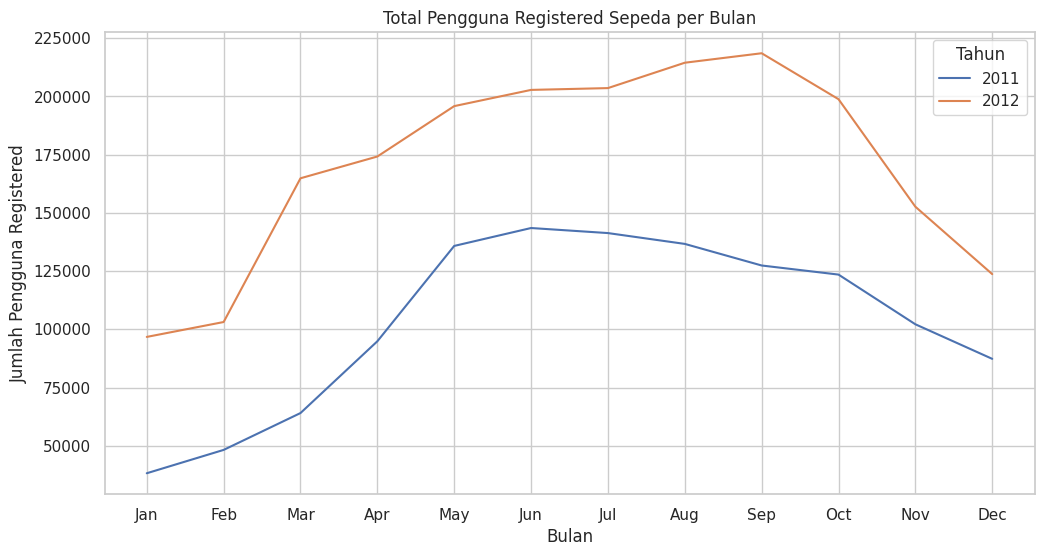

In [42]:
# Mengambil tahun dan bulan dari kolom 'dateday'
day_data['year'] = pd.to_datetime(day_data['dateday']).dt.year
day_data['month'] = pd.to_datetime(day_data['dateday']).dt.month

# Menghitung jumlah total pengguna casual, registered, dan total pengguna per bulan
users_by_month = day_data.groupby(by=["year", "month"]).agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",  # Menggunakan 'cnt' sebagai pengganti 'count'
}).reset_index()

# Plot total pengguna casual, registered, dan total pengguna per bulan
plt.figure(figsize=(12, 6))
for year in users_by_month['year'].unique():
    data_year = users_by_month[users_by_month['year'] == year]
    plt.plot(data_year['month'], data_year['count'], label=str(year))  # Menggunakan 'cnt' sebagai pengganti 'count'

plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna Registered")
plt.title("Total Pengguna Registered Sepeda per Bulan")
plt.legend(title="Tahun")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid(True)
plt.show()


## Visualization & Explanatory Analysis

1. Bagaimana karakteristik dan perbandingan jumlah pengguna sepeda yang berbeda antara casual dan registered?

---



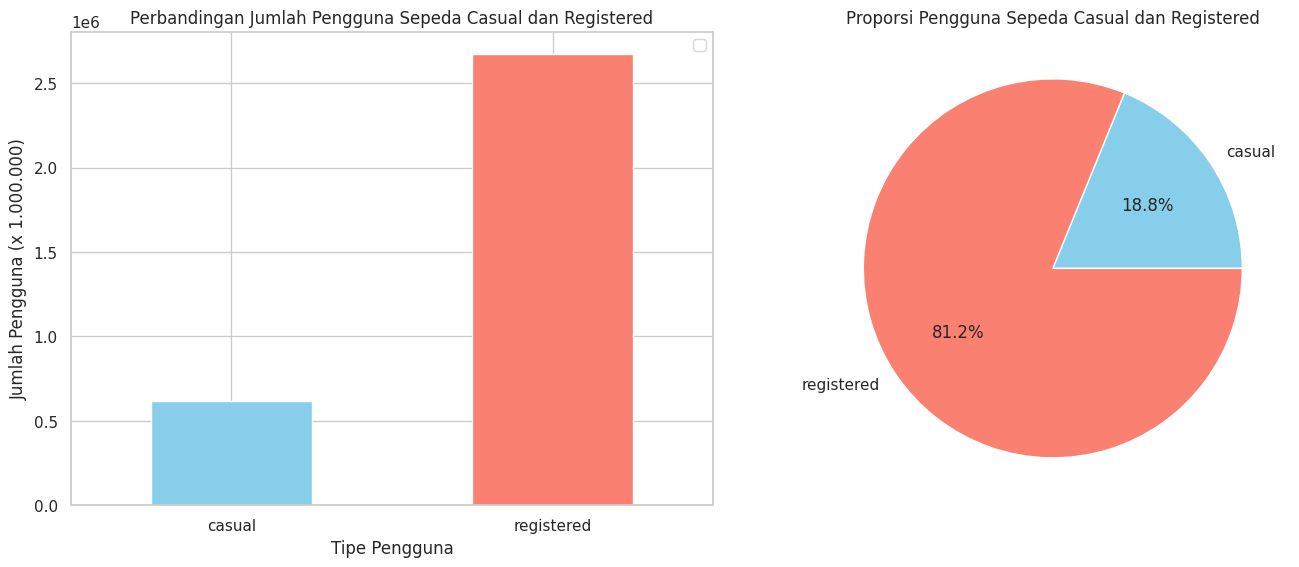

In [43]:
# Membuat dataframe baru untuk menyimpan total pengguna casual dan registered
users_type = day_data[['casual', 'registered']].sum()

# Mengatur parameter visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisasi diagram batang
users_type.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'], rot=0)
axes[0].set_title('Perbandingan Jumlah Pengguna Sepeda Casual dan Registered')
axes[0].set_xlabel('Tipe Pengguna')
axes[0].set_ylabel('Jumlah Pengguna (x 1.000.000)')
axes[0].legend(title='')

# Visualisasi diagram lingkaran
users_type.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], colors=['skyblue', 'salmon'])
axes[1].set_title('Proporsi Pengguna Sepeda Casual dan Registered')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

- Jumlah Pengguna Registered Lebih Banyak: Grafik batang menunjukkan jumlah pengguna registered jauh lebih banyak sekitar 4x dibandingkan dengan pengguna casual. Hal ini terlihat dari panjang bar untuk pengguna registered yang lebih panjang dibandingkan dengan bar untuk pengguna casual.

- Persentase Porsi Pengguna: Diagram lingkaran menampilkan persentase atau proporsi antara pengguna casual dan registered. Angka persentase yang ditampilkan pada diagram lingkaran memberikan gambaran yang jelas tentang seberapa besar dominasi pengguna registered dibandingkan dengan casual dalam keseluruhan penggunaan sepeda.

---



2. Apakah terjadi tren kenaikan atau penurunan dari tahun 2011-2012?


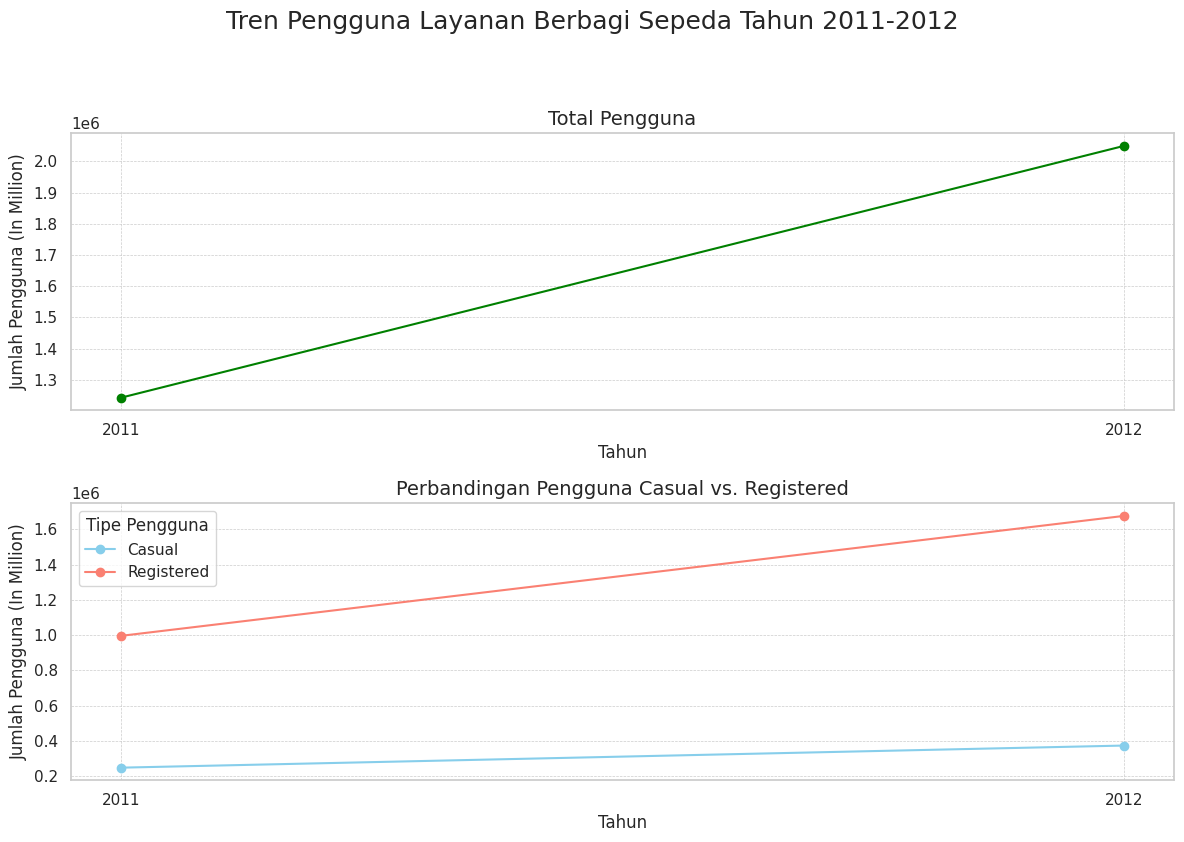

In [44]:
users_by_year = day_data.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum",
})

# Mengatur figure
plt.figure(figsize=(12, 8))

# Judul utama
plt.suptitle("Tren Pengguna Layanan Berbagi Sepeda Tahun 2011-2012", fontsize=18, y=1.05)

# Plot Total Pengguna
plt.subplot(2, 1, 1)
plt.plot(users_by_year.index, users_by_year['count'], marker='o', linestyle='-', color='green')
plt.title("Total Pengguna", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pengguna (In Million)")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(users_by_year.index, labels=['2011', '2012'])  # Memastikan hanya menampilkan tahun yang ada

# Plot Perbandingan Pengguna Casual vs Terdaftar
plt.subplot(2, 1, 2)
plt.plot(users_by_year.index, users_by_year['casual'], label="Casual", marker='o', linestyle='-', color='skyblue')
plt.plot(users_by_year.index, users_by_year['registered'], label="Registered", marker='o', linestyle='-', color='salmon')
plt.title("Perbandingan Pengguna Casual vs. Registered", fontsize=14)
plt.xlabel("Tahun")
plt.ylabel("Jumlah Pengguna (In Million)")
plt.legend(title="Tipe Pengguna")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(users_by_year.index, labels=['2011', '2012'])  # Memastikan hanya menampilkan tahun yang ada

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

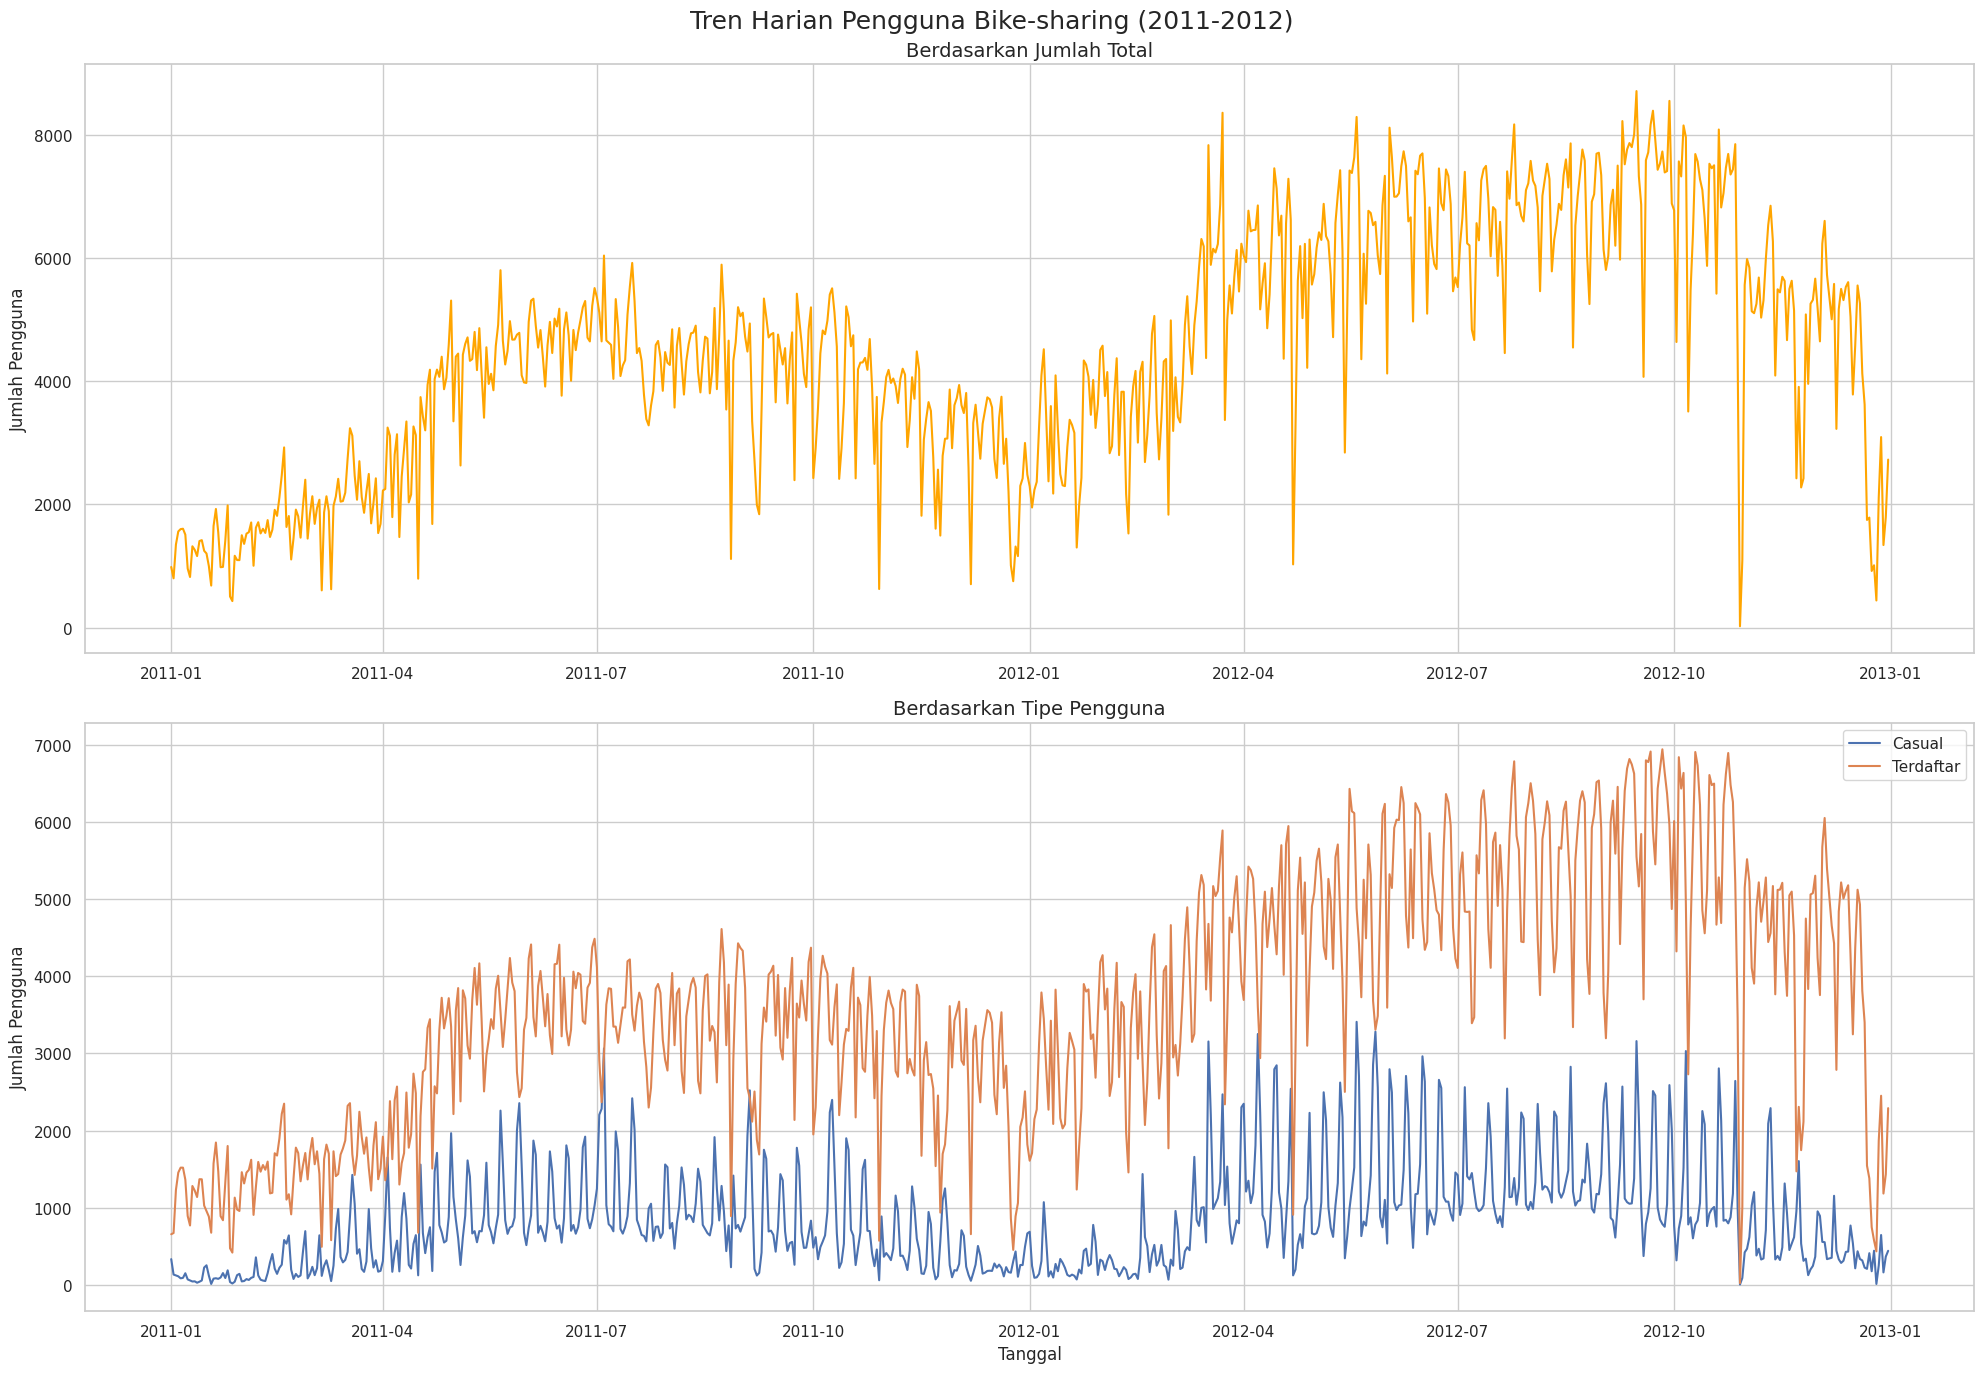

In [45]:
# Mengatur ukuran dan judul utama dari figure
plt.figure(figsize=(20, 14))
plt.suptitle("Tren Harian Pengguna Bike-sharing (2011-2012)", fontsize=18)

# Membuat line plot untuk jumlah total pengguna
plt.subplot(2, 1, 1)
sns.lineplot(
    x="dateday",
    y="count",
    data=day_data,
    color="orange",
)
plt.title("Berdasarkan Jumlah Total", fontsize=14)
plt.xlabel("")  # Menyembunyikan label sumbu x
plt.ylabel("Jumlah Pengguna", fontsize=12)

# Membuat line plot untuk pengguna casual dan terdaftar
plt.subplot(2, 1, 2)
sns.lineplot(
    x="dateday",
    y="casual",
    data=day_data,
    label="Casual",
)
sns.lineplot(
    x="dateday",
    y="registered",
    data=day_data,
    label="Terdaftar",
)
plt.title("Berdasarkan Tipe Pengguna", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)

plt.tight_layout()  # Menyesuaikan layout
plt.show()  # Menampilkan plot

In [46]:
# Agregasi jumlah pengguna (casual, registered, dan total) per bulan
monthly_users = day_data.resample('M', on='dateday').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum',
})

# Memformat indeks untuk menampilkan nama bulan dan tahun (misal, Jan-20 untuk Januari 2020)
monthly_users.index = monthly_users.index.strftime('%b-%y')

# Menampilkan 5 baris pertama dari dataframe hasil agregasi
print(monthly_users.head())

         casual  registered   count
dateday                            
Jan-11     3073       35116   38189
Feb-11     6242       41973   48215
Mar-11    12826       51219   64045
Apr-11    22346       72524   94870
May-11    31050      104771  135821


In [47]:
monthly_users = monthly_users.reset_index()
monthly_users = monthly_users.rename(columns={"dateday": "month-year"})

monthly_users.head()

,month-year,casual,registered,count
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821


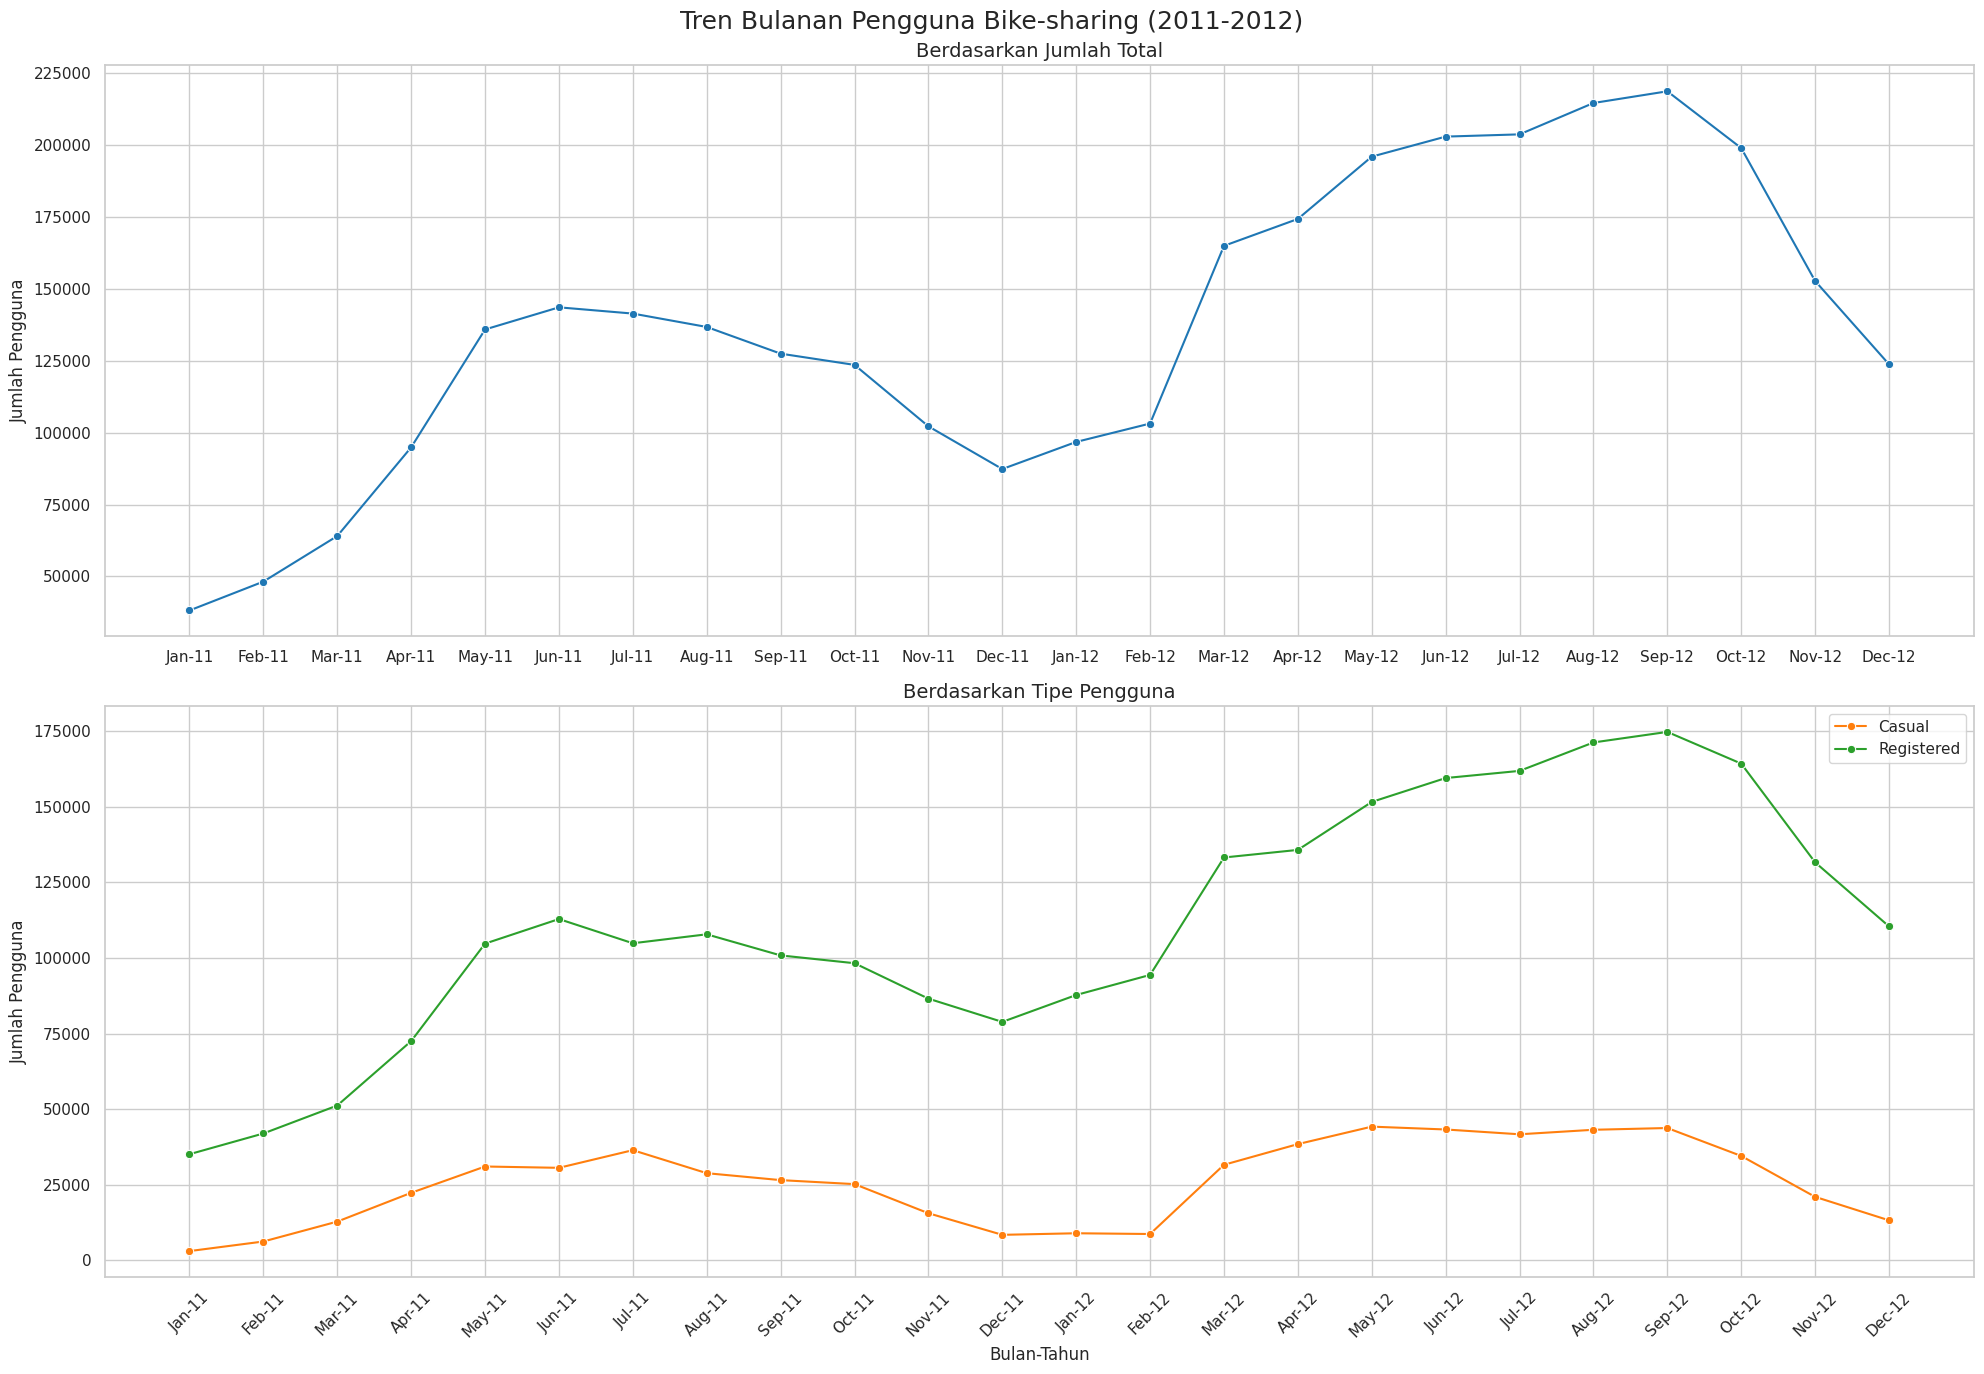

In [48]:
# Mengatur ukuran dan judul utama dari figure
plt.figure(figsize=(20, 14))
plt.suptitle("Tren Bulanan Pengguna Bike-sharing (2011-2012)", fontsize=18)

# Membuat line plot untuk jumlah total pengguna
plt.subplot(2, 1, 1)
sns.lineplot(
    x="month-year",
    y="count",
    data=monthly_users,
    marker="o",
    color="#1f77b4",  # Ubah warna menjadi biru
)
plt.title("Berdasarkan Jumlah Total", fontsize=14)
plt.xlabel("")  # Menyembunyikan label sumbu x sementara
plt.ylabel("Jumlah Pengguna", fontsize=12)

# Membuat line plot untuk pengguna casual dan terdaftar
plt.subplot(2, 1, 2)
sns.lineplot(
    x="month-year",
    y="casual",
    data=monthly_users,
    marker="o",
    label="Casual",
    color="#ff7f0e",  # Ubah warna menjadi oranye untuk casual
)
sns.lineplot(
    x="month-year",
    y="registered",
    data=monthly_users,
    marker="o",
    label="Registered",
    color="#2ca02c",  # Ubah warna menjadi hijau untuk terdaftar
)
plt.title("Berdasarkan Tipe Pengguna", fontsize=14)
plt.xlabel("Bulan-Tahun", fontsize=12)  # Menambahkan label sumbu x
plt.ylabel("Jumlah Pengguna", fontsize=12)

# Mengatur rotasi label sumbu x agar mudah dibaca
plt.xticks(rotation=45)  # Rotasi label sumbu x

plt.tight_layout()
plt.show()

- Terdapat peningkatan jumlah pengguna layanan bike-sharing pada tahun 2012 dibandingkan tahun sebelumnya, khususnya pada kelompok pengguna yang terdaftar.
- Kita dapat mengamati adanya pola musiman selama dua tahun tersebut. Jumlah perjalanan menggunakan layanan bike-sharing umumnya rendah di awal tahun, kemudian mulai meningkat di kuartal kedua (Q2) serta mencapai peak di Q3, dan kembali menurun di kuartal keempat (Q4).
- Selama dua tahun terakhir, meskipun pengguna casual dan registered sama-sama menunjukkan peningkatan, jumlah pengguna registered meningkat dengan signifikan melebihi pengguna casual dari segi jumlah.

---



3.  Bagaimanakah pengaruh musim, bulan, hari, hari libur, dan cuaca terhadap tingkat penggunaan bike-sharing, termasuk identifikasi pada musim, bulan, dan hari apa mencapai penggunaan tertinggi?

Pengguna berdasarkan musim

<ipython-input-93-6d7ca892e648>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_users_by_season.index, y="count", data=sorted_users_by_season, order=season_order, palette="autumn")


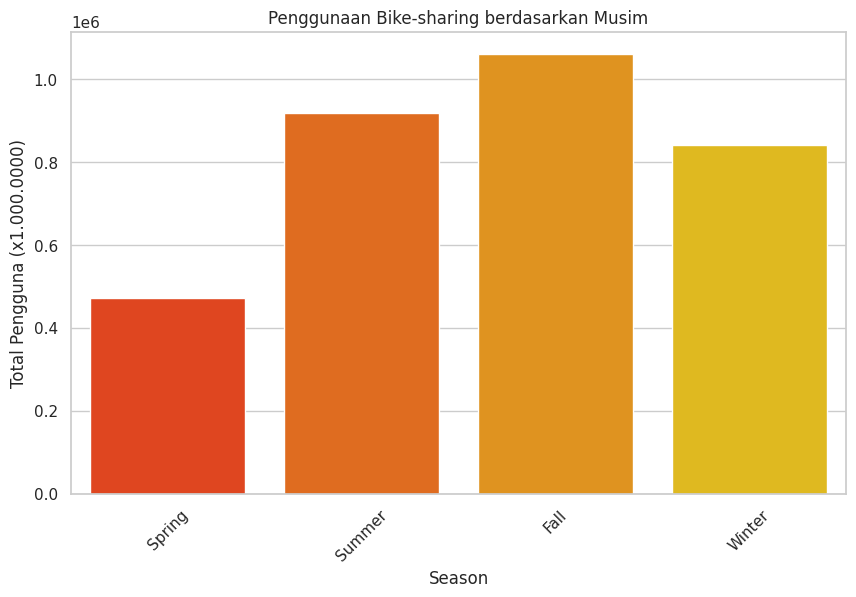

In [93]:
# Mengatur urutan musim berdasarkan konteks geografis atau kebiasaan lokal jika perlu
season_order = ["Spring", "Summer", "Fall", "Winter"]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_users_by_season.index, y="count", data=sorted_users_by_season, order=season_order, palette="autumn")
plt.title("Penggunaan Bike-sharing berdasarkan Musim")
plt.xlabel("Season")
plt.ylabel("Total Pengguna (x1.000.0000)")
plt.xticks(rotation=45)  # Rotasi label
plt.show()

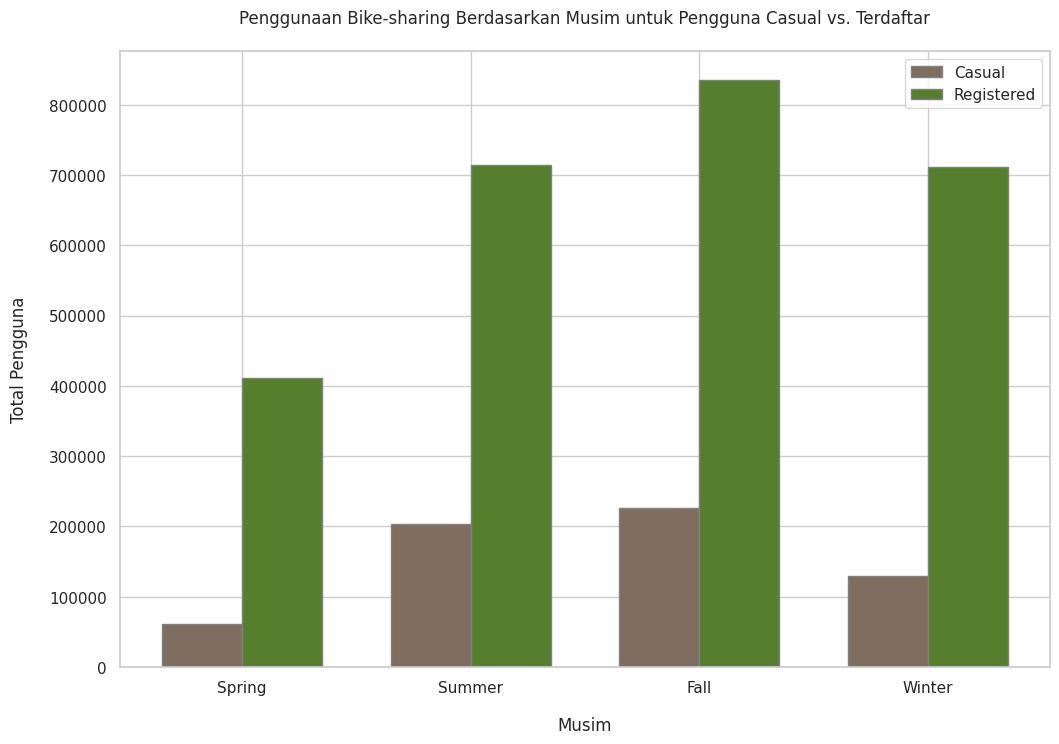

In [75]:
# Mengatur ukuran figure
plt.figure(figsize=(12, 8))

# Mengatur lebar bar
barWidth = 0.35

# Menyiapkan data untuk pengguna casual dan pengguna terdaftar
bars1 = users_by_season['casual'][season_order]  # Pengguna casual
bars2 = users_by_season['registered'][season_order]  # Pengguna terdaftar

# Menyiapkan posisi bar di sumbu X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Membuat bar untuk pengguna casual
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='grey', label='Casual')

# Membuat bar untuk pengguna terdaftar
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='grey', label='Registered')

# Menambahkan judul dan label
plt.title('Penggunaan Bike-sharing Berdasarkan Musim untuk Pengguna Casual vs. Terdaftar', pad=20)
plt.xlabel('Musim', labelpad=15)
plt.ylabel('Total Pengguna', labelpad=15)

# Menambahkan ticks di sumbu x
plt.xticks([r + barWidth/2 for r in range(len(bars1))], season_order)

# Membuat legenda
plt.legend()

# Menampilkan visualisasi
plt.show()


Pengguna berdasarkan cuaca

<ipython-input-79-e59be9f1b86d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_users_by_weather.index, y="count", data=sorted_users_by_weather, order=weather_order, palette="mako")


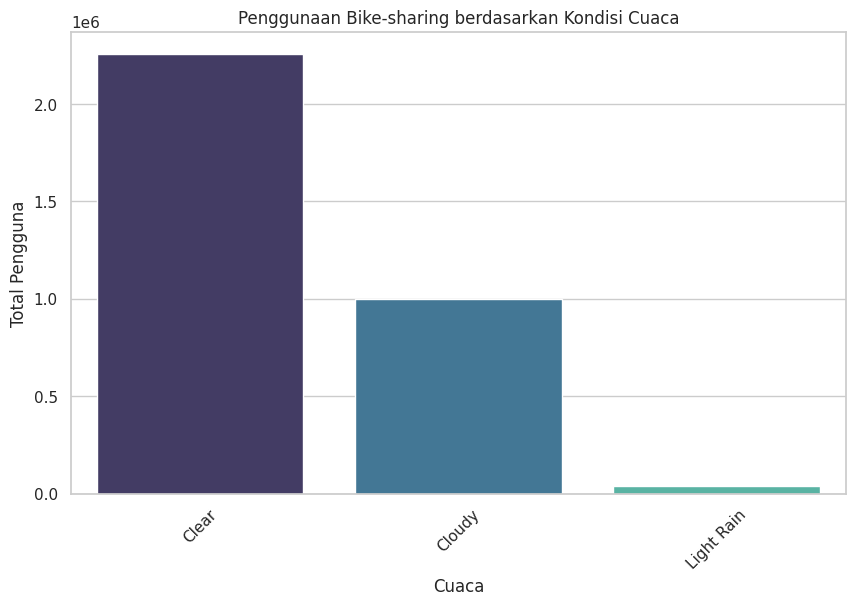

In [79]:
# Mengatur urutan cuaca dari yang terbaik ke terburuk untuk memudahkan interpretasi
weather_order = ["Clear", "Cloudy", "Light Rain"]

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_users_by_weather.index, y="count", data=sorted_users_by_weather, order=weather_order, palette="mako")
plt.title("Penggunaan Bike-sharing berdasarkan Kondisi Cuaca")
plt.xlabel("Cuaca")
plt.ylabel("Total Pengguna")
plt.xticks(rotation=45)
plt.show()

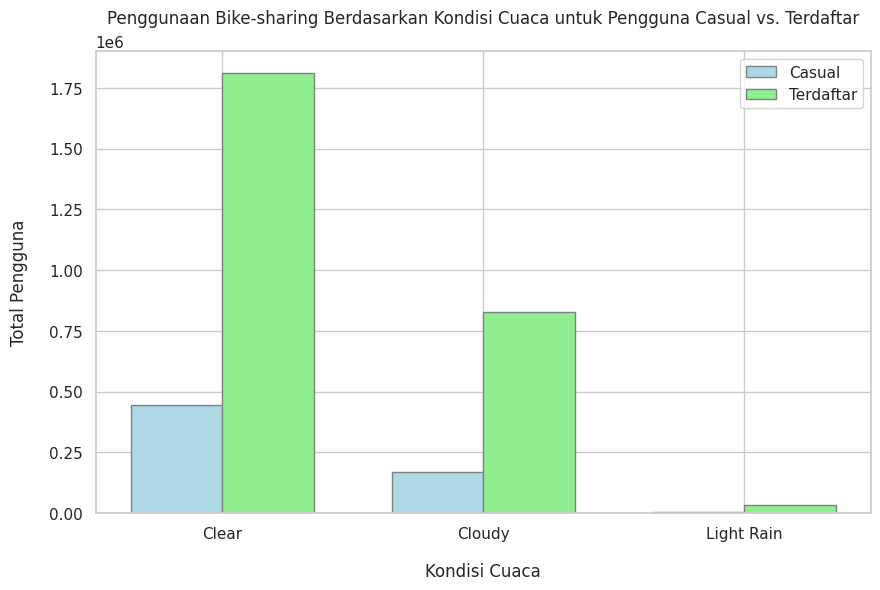

In [81]:
# Mengatur urutan cuaca dari yang terbaik ke terburuk untuk memudahkan interpretasi
weather_order = ["Clear", "Cloudy", "Light Rain"]

plt.figure(figsize=(10, 6))
# Mengatur lebar bar
barWidth = 0.35

# Menyiapkan data untuk pengguna casual dan registered
bars1 = users_by_weather.loc[weather_order, 'casual']  # Pengguna casual
bars2 = users_by_weather.loc[weather_order, 'registered']  # Pengguna registered

# Menyiapkan posisi bar di sumbu X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Membuat bar untuk pengguna casual
plt.bar(r1, bars1, color='#add8e6', width=barWidth, edgecolor='grey', label='Casual')

# Membuat bar untuk pengguna registered
plt.bar(r2, bars2, color='#90ee90', width=barWidth, edgecolor='grey', label='Terdaftar')

# Menambahkan judul dan label dengan bahasa Indonesia
plt.title('Penggunaan Bike-sharing Berdasarkan Kondisi Cuaca untuk Pengguna Casual vs. Terdaftar', pad=20)
plt.xlabel('Kondisi Cuaca', labelpad=15)
plt.ylabel('Total Pengguna (x 1.000.000)', labelpad=15)

# Menambahkan ticks di sumbu x dengan label cuaca
plt.xticks([r + barWidth/2 for r in range(len(bars1))], weather_order)

# Membuat legenda
plt.legend()

# Menampilkan visualisasi
plt.show()

Pengguna berdasarkan bulan

<ipython-input-83-e3a1556f0aba>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_users_by_month.index, y="count", data=sorted_users_by_month, order=month_order, palette='viridis')


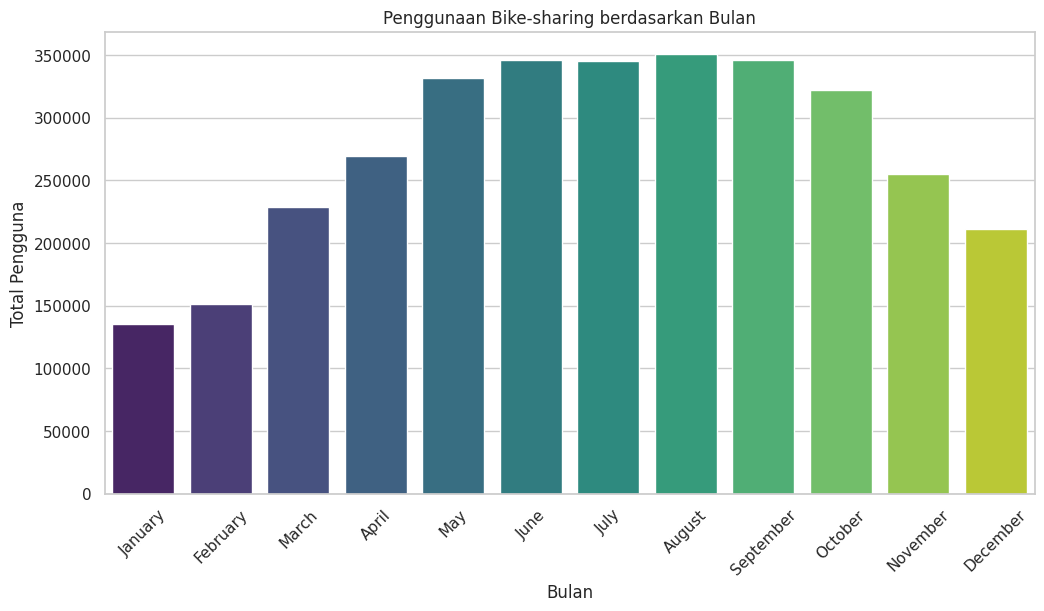

In [83]:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_users_by_month.index, y="count", data=sorted_users_by_month, order=month_order, palette='viridis')
plt.title("Penggunaan Bike-sharing berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pengguna")
plt.xticks(rotation=45)  # Rotasi label untuk keterbacaan yang lebih baik
plt.show()

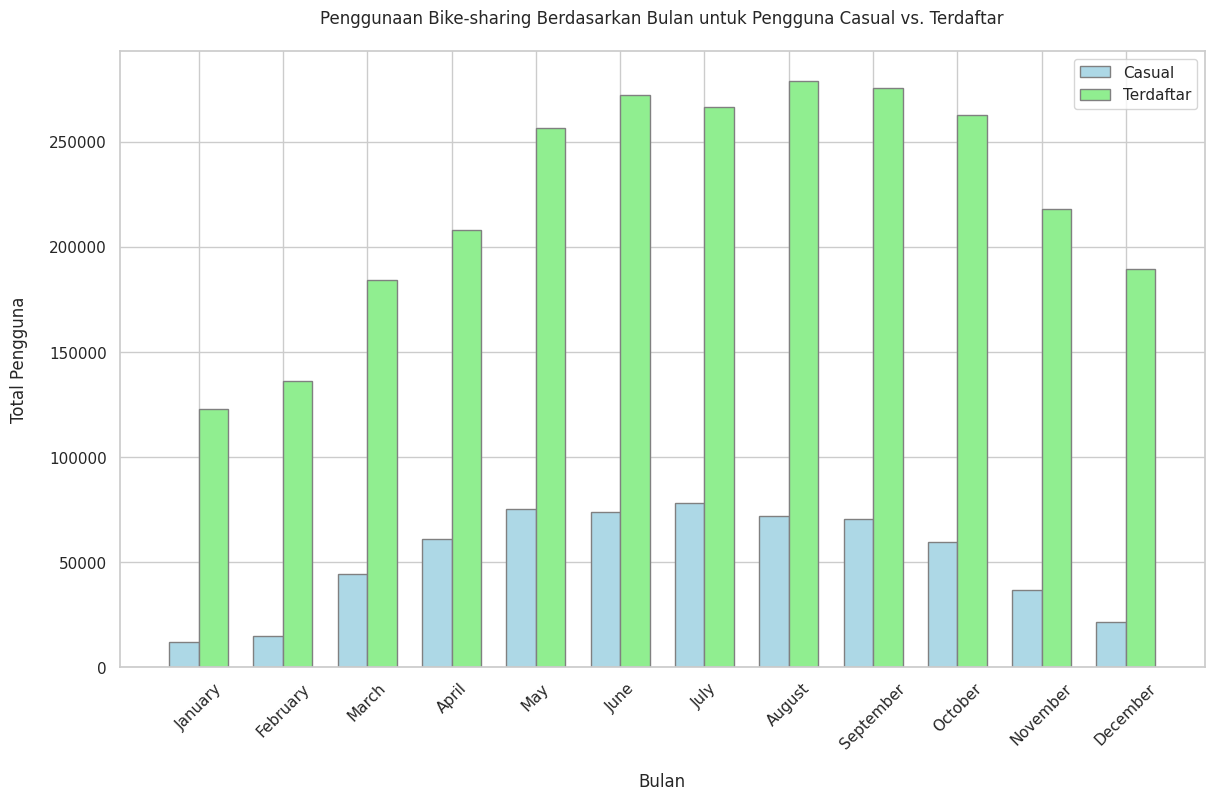

In [85]:
# Mengatur ukuran figure
plt.figure(figsize=(14, 8))

# Mengatur lebar bar
barWidth = 0.35

# Menyiapkan data untuk pengguna casual dan registered
bars1 = sorted_users_by_month.loc[month_order, 'casual']  # Pengguna casual
bars2 = sorted_users_by_month.loc[month_order, 'registered']  # Pengguna registered

# Menyiapkan posisi bar di sumbu X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Membuat bar untuk pengguna casual
plt.bar(r1, bars1, color='#add8e6', width=barWidth, edgecolor='grey', label='Casual')

# Membuat bar untuk pengguna registered
plt.bar(r2, bars2, color='#90ee90', width=barWidth, edgecolor='grey', label='Registered')

# Menambahkan judul dan label dengan bahasa Indonesia
plt.title('Penggunaan Bike-sharing Berdasarkan Bulan untuk Pengguna Casual vs. Terdaftar', pad=20)
plt.xlabel('Bulan', labelpad=15)
plt.ylabel('Total Pengguna', labelpad=15)

# Menambahkan ticks di sumbu x dengan label bulan
plt.xticks([r + barWidth/2 for r in range(len(bars1))], month_order, rotation=45)

# Membuat legenda
plt.legend()

# Menampilkan visualisasi
plt.show()


Pengguna berdasarkan hari

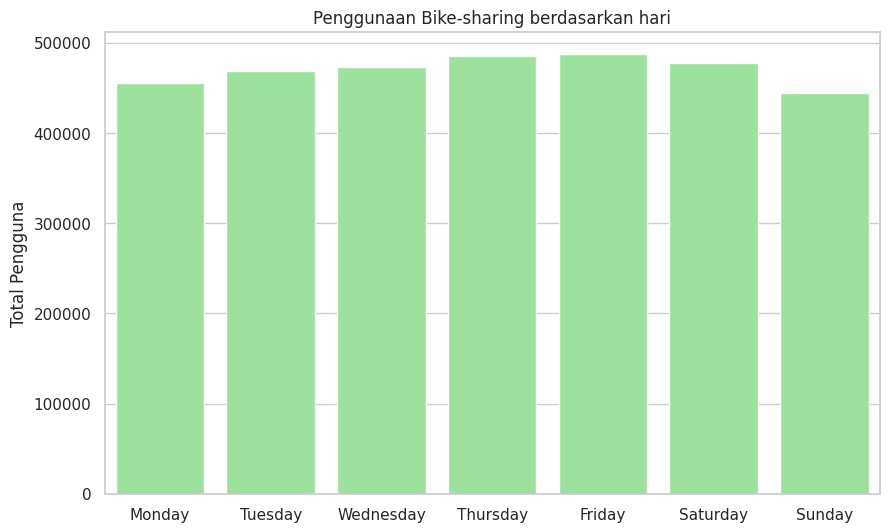

In [91]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="count",
    data=users_by_weekday,
    order=day_order,
    color="lightgreen",
)
plt.title("Penggunaan Bike-sharing berdasarkan hari")
plt.xlabel(None)
plt.ylabel("Total Pengguna")
plt.show()

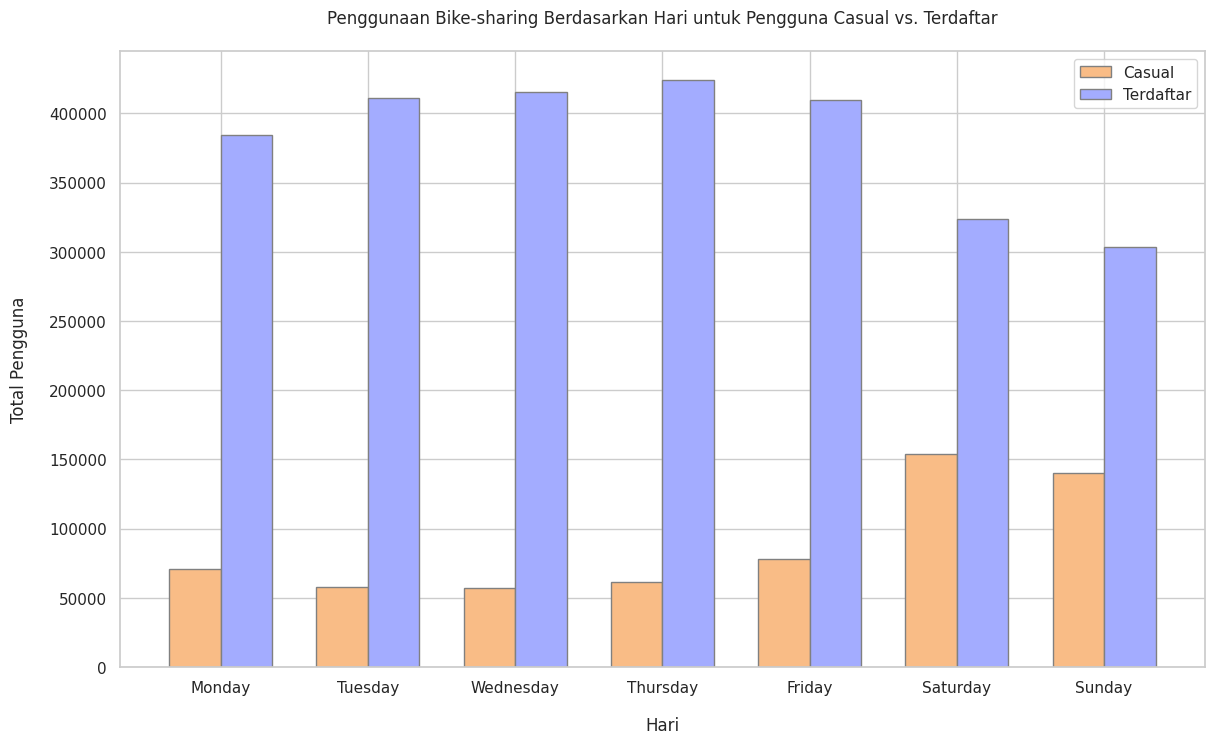

In [88]:
plt.figure(figsize=(14, 8))

# Mengatur lebar bar
barWidth = 0.35

# Menyiapkan data untuk pengguna casual dan registered
bars1 = users_by_weekday.loc[day_order, 'casual'].values  # Pengguna casual
bars2 = users_by_weekday.loc[day_order, 'registered'].values  # Pengguna registered

# Menyiapkan posisi bar di sumbu X
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Membuat bar untuk pengguna casual
plt.bar(r1, bars1, color='#f9bc86', width=barWidth, edgecolor='grey', label='Casual')

# Membuat bar untuk pengguna registered
plt.bar(r2, bars2, color='#a3acff', width=barWidth, edgecolor='grey', label='Terdaftar')

# Menambahkan judul dan label dengan bahasa Indonesia
plt.title('Penggunaan Bike-sharing Berdasarkan Hari untuk Pengguna Casual vs. Terdaftar', pad=20)
plt.xlabel('Hari', labelpad=15)
plt.ylabel('Total Pengguna', labelpad=15)

# Menambahkan ticks di sumbu x dengan label hari
plt.xticks([r + barWidth / 2 for r in range(len(bars1))], day_order)

# Membuat legenda
plt.legend()

# Menampilkan visualisasi
plt.show()


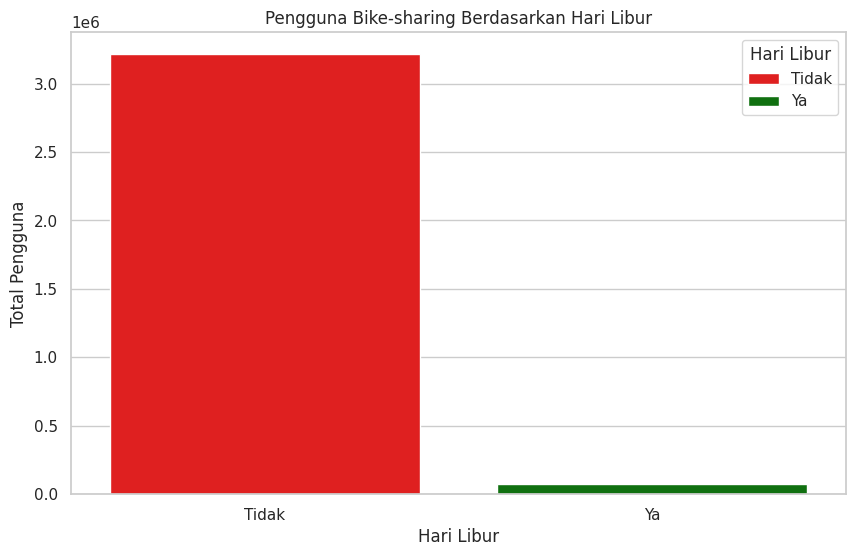

In [97]:
plt.figure(figsize=(10, 6))

bar = sns.barplot(
    x="holiday",
    y="count",
    hue="holiday",
    data=users_by_holiday,
    palette=["red", "green"],  # Merah untuk hari biasa, Hijau untuk hari libur
)

plt.title("Pengguna Bike-sharing Berdasarkan Hari Libur")
plt.xlabel("Hari Libur")
plt.ylabel("Total Pengguna")
plt.xticks(ticks=[0, 1], labels=["Tidak", "Ya"])

# Menyesuaikan legenda
handles, labels = bar.get_legend_handles_labels()
plt.legend(handles, ["Tidak", "Ya"], title="Hari Libur", loc="upper right")

plt.show()

- Musim Gugur: Penggunaan bike-sharing tertinggi pada musim gugur yang disebabkan beberapa faktor yaitu karena cuaca yang sejuk dan nyaman, serta keindahan alam yang mendorong lebih banyak orang untuk bersepeda.
- Cuaca Cerah: Kondisi cuaca cerah mempengaruhi penggunaan bike-sharing paling banyak karena menawarkan keamanan dan kenyamanan terbaik untuk bersepeda.
- Agustus: Bulan Agustus menjadi puncak penggunaan bike-sharing, kemungkinan karena cuaca hangat musim panas dan periode liburan yang memungkinkan lebih banyak waktu luang untuk aktivitas luar ruangan.
- Hari Jumat: Tingginya penggunaan pada hari Jumat menunjukkan preferensi untuk memulai aktivitas akhir pekan lebih awal, memanfaatkan bike-sharing untuk rekreasi atau pertemuan sosial.
- Lebih Tinggi di Hari Biasa: Permintaan sepeda yang lebih tinggi pada hari yang bukan hari libur menunjukkan bahwa bike-sharing banyak digunakan untuk keperluan sehari-hari seperti pergi ke tempat kerja atau sekolah. Ini menandakan bahwa bike-sharing tidak hanya populer sebagai aktivitas rekreasi tetapi juga sebagai bagian dari rutinitas harian orang banyak.

## Conclusion

-  **Bagaimana karakteristik dan perbandingan jumlah pengguna sepeda yang berbeda antara casual dan registered?**
    
    Karakteristik dan perbandingan jumlah pengguna sepeda antara casual dan registered dapat diringkas sebagai berikut:

#### Karakteristik Pengguna Casual:
- *Penggunaan Sporadis*: Pengguna casual cenderung menggunakan layanan bike-sharing secara tidak teratur, seringkali dikaitkan dengan kegiatan rekreasi atau kebutuhan transportasi sesekali.
- *Variabilitas Tinggi*: Jumlah pengguna casual bisa sangat bervariasi tergantung pada faktor eksternal seperti cuaca, musim, atau hari libur.
- *Ketergantungan pada Kondisi Cuaca dan Musim*: Pengguna casual lebih banyak menggunakan layanan di hari dengan cuaca cerah dan di musim-musim tertentu yang lebih nyaman untuk bersepeda, seperti musim semi dan musim panas.

#### Karakteristik Pengguna Registered:
- *Penggunaan Rutin*: Pengguna registered menunjukkan pola penggunaan yang lebih konsisten, seringkali sebagai bagian dari rutinitas harian mereka, seperti untuk pergi ke tempat kerja atau institusi pendidikan.
- *Lebih Stabil*: Jumlah pengguna registered kurang dipengaruhi oleh variabilitas eksternal dibandingkan dengan pengguna casual, menunjukkan ketergantungan yang lebih rendah pada kondisi cuaca atau musim.
- *Loyalitas dan Keterikatan*: Pengguna registered cenderung memiliki tingkat loyalitas yang lebih tinggi terhadap layanan bike-sharing, yang mungkin ditunjukkan melalui langganan atau frekuensi penggunaan yang lebih tinggi.

### Perbandingan Jumlah Pengguna:
- *Jumlah Total*: Secara umum, pengguna registered cenderung menyumbang sebagian besar penggunaan bike-sharing dibandingkan dengan pengguna casual. Hal ini menunjukkan bahwa layanan bike-sharing sangat bergantung pada pengguna yang menggunakan layanan tersebut sebagai bagian dari kehidupan sehari-hari mereka.
- *Pengaruh Eksternal*: Pengguna casual lebih sensitif terhadap perubahan eksternal seperti cuaca dan musim, sedangkan pengguna registered menunjukkan kestabilan dalam penggunaan yang mencerminkan ketergantungan pada layanan tersebut untuk keperluan transportasi sehari-hari.
- *Preferensi dan Kebutuhan*: Kedua kelompok pengguna melayani kebutuhan dan preferensi yang berbeda, dengan pengguna casual lebih terfokus pada kegiatan rekreasi dan kebutuhan transportasi sesekali, sementara pengguna registered lebih mengintegrasikan bike-sharing ke dalam rutinitas harian mereka.

Kesimpulannya, perbedaan karakteristik dan jumlah pengguna antara casual dan registered menunjukkan bahwa layanan bike-sharing melayani spektrum pengguna yang luas dengan kebutuhan dan motivasi yang bervariasi. Ini menekankan pentingnya strategi yang berbeda dalam melayani dan menarik kedua segmen pengguna untuk meningkatkan adopsi dan penggunaan layanan bike-sharing.


- **Apakah terjadi tren kenaikan atau penurunan dari tahun 2011-2012?**

    Selama periode 2011 hingga 2012, terdapat peningkatan signifikan dalam jumlah pengguna layanan berbagi sepeda, terutama diantara pengguna terdaftar. Analisis tahunan menunjukkan pola yang konsisten di mana jumlah penggunaan mencapai titik terendah pada kuartal pertama, puncaknya pada kuartal ketiga, dan kemudian menurun pada kuartal keempat. Pengguna terdaftar, secara khusus, menunjukkan pertumbuhan jumlah yang lebih besar dibandingkan dengan pengguna kasual, dengan kedua kategori pengguna mencatat peningkatan. Tahun 2012 menyaksikan lebih banyak perjalanan berbagi sepeda dibandingkan dengan tahun 2011, mengikuti tren dan musiman yang sama di mana jumlah perjalanan meningkat di pertengahan tahun dan menurun di awal serta akhir tahun.

- Bagaimanakah pengaruh musim, bulan, hari, hari libur, dan cuaca terhadap tingkat penggunaan bike-sharing, termasuk identifikasi pada musim, bulan, dan hari apa mencapai penggunaan tertinggi?
  
    Analisis data mengenai penggunaan bike-sharing menunjukkan bahwa faktor musim, bulan, hari, hari libur, dan kondisi cuaca memiliki pengaruh signifikan terhadap pola penggunaan layanan ini. Berikut adalah sintesis analisis yang dilakukan untuk menjawab pertanyaan analisis tersebut:
    
    **Pengaruh Musim**: Data menunjukkan bahwa musim "Fall" mengalami tingkat penggunaan tertinggi dibandingkan dengan musim lainnya. Ini bisa disebabkan oleh kondisi cuaca yang lebih nyaman untuk bersepeda, dimana suhu tidak terlalu panas atau dingin, dan kurangnya curah hujan dibandingkan dengan musim lainnya. Hal ini menunjukkan kecenderungan pengguna untuk memilih bersepeda sebagai moda transportasi atau aktivitas rekreasi ketika kondisi lingkungan mendukung.

    **Pengaruh Bulan**: Analisis menunjukkan bahwa bulan Agustus mencatat tingkat penggunaan tertinggi. Hal ini dapat dikaitkan dengan kondisi cuaca yang menyenangkan selama akhir musim panas dan banyaknya kegiatan luar ruangan yang terjadi selama periode ini, yang mendorong lebih banyak orang untuk menggunakan bike-sharing.

    **Pengaruh Hari**: Terdapat peningkatan penggunaan pada hari Jumat dibandingkan dengan hari lain dalam seminggu. Ini mungkin mencerminkan kecenderungan orang untuk menggunakan bike-sharing untuk aktivitas sosial atau rekreasi menjelang akhir pekan.

    **Pengaruh Hari Libur**: Analisis juga menunjukkan bahwa penggunaan bike-sharing lebih tinggi pada hari-hari biasa dibandingkan dengan hari libur. Ini bisa jadi karena pada hari kerja, lebih banyak orang yang menggunakan bike-sharing untuk keperluan komuter, seperti pergi ke tempat kerja atau institusi pendidikan, sedangkan pada hari libur, penggunaan cenderung menurun karena orang lebih memilih untuk beristirahat di rumah atau menggunakan moda transportasi lain untuk perjalanan jarak jauh.

    **Pengaruh Cuaca**: Cuaca cerah menunjukkan tingkat penggunaan tertinggi dibandingkan dengan kondisi cuaca lainnya. Hal ini intuitif mengingat cuaca yang cerah dan menyenangkan secara alami mendorong aktivitas luar ruangan, termasuk bersepeda.

**Kesimpulan**: Faktor lingkungan seperti musim, cuaca, dan hari dalam minggu memiliki pengaruh yang kuat terhadap penggunaan bike-sharing. Operator bike-sharing dapat memanfaatkan insight ini untuk merencanakan alokasi sepeda, menjadwalkan pemeliharaan, dan merancang kampanye pemasaran yang lebih efektif. Misalnya, menawarkan promosi khusus pada hari dengan penggunaan rendah untuk meratakan permintaan atau meningkatkan ketersediaan sepeda di lokasi-lokasi populer selama musim dan bulan dengan penggunaan tinggi. Memahami pola penggunaan ini memungkinkan operator untuk mengoptimalkan operasi dan meningkatkan kepuasan pengguna, yang pada akhirnya dapat berkontribusi pada kesuksesan jangka panjang layanan bike-sharing.